In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [4]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [5]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [6]:
data_baseline = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_baseline_7.0_cropped.nc')

In [7]:
data_oae = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_OAE_7.0_cropped.nc')

In [8]:
data_baseline = data_baseline.fco2[0,:]
data_oae = data_oae.fco2[0,:]

In [9]:
data_baseline = data_baseline.to_dataset(name='fco2')
data_oae = data_oae.to_dataset(name='fco2')

In [10]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [11]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [12]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month
fco2_base = ((dataframe_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [13]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month
fco2_oae = ((dataframe_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

### Averaged Annual Amplitude of Ocean pCO2 for the last ten years without OAE

In [14]:
fco2_max_base = fco2_base.resample(time_counter='AS').max('time_counter')

In [15]:
fco2_min_base = fco2_base.resample(time_counter='AS').min('time_counter')

In [16]:
fco2_amplitude_base = (fco2_max_base['fco2'] - fco2_min_base['fco2']).to_dataset(name='fco2')

In [17]:
fco2_amplitude_base_map = (fco2_amplitude_base.fco2.mean(dim=('time_counter'))).to_dataset(name='fco2')

Text(0.5, 1.06, 'Ocean pCO2 seasonal cycle change without OAE')

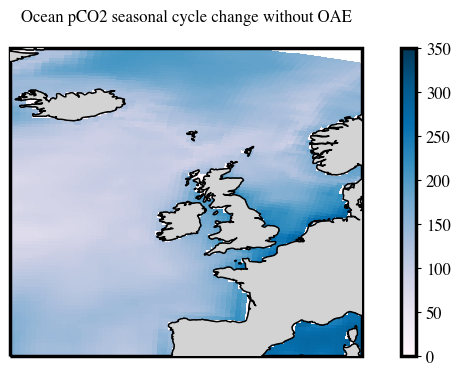

In [18]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_base_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 350, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('Ocean pCO2 seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of Ocean pCO2 for the last ten years with OAE

In [19]:
fco2_max_oae = fco2_oae.resample(time_counter='AS').max('time_counter')

In [20]:
fco2_min_oae = fco2_oae.resample(time_counter='AS').min('time_counter')

In [21]:
fco2_amplitude_oae = (fco2_max_oae['fco2'] - fco2_min_oae['fco2']).to_dataset(name='fco2')

In [22]:
fco2_amplitude_oae_map = (fco2_amplitude_oae.fco2.mean(dim=('time_counter'))).to_dataset(name='fco2')

Text(0.5, 1.06, 'Ocean pCO2 seasonal cycle change with OAE')

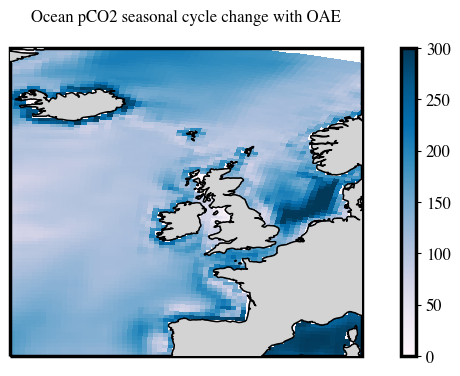

In [23]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_oae_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 300, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)
        
plt.title('Ocean pCO2 seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ Ocean pCO2 between Baseline and OAE scenario

In [24]:
fco2_amplitude_change = fco2_amplitude_oae - fco2_amplitude_base

In [25]:
fco2_amplitude_change_map = (fco2_amplitude_change.fco2.mean(dim=('time_counter'))).to_dataset(name='fco2')

Text(0.5, 1.06, 'Ocean pCO2 seasonal cycle difference between with and without OAE')

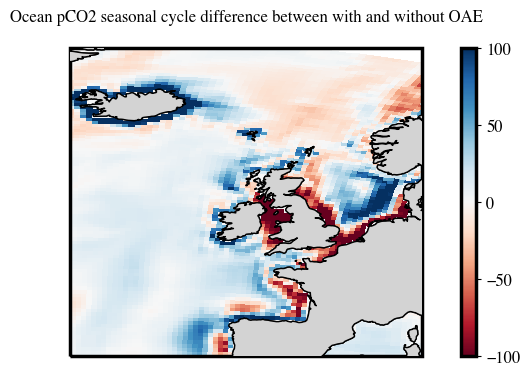

In [26]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=fco2_amplitude_change_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = -100, vmax = 100, cmap="RdBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('Ocean pCO2 seasonal cycle difference between with and without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of Ocean pCO2 over time

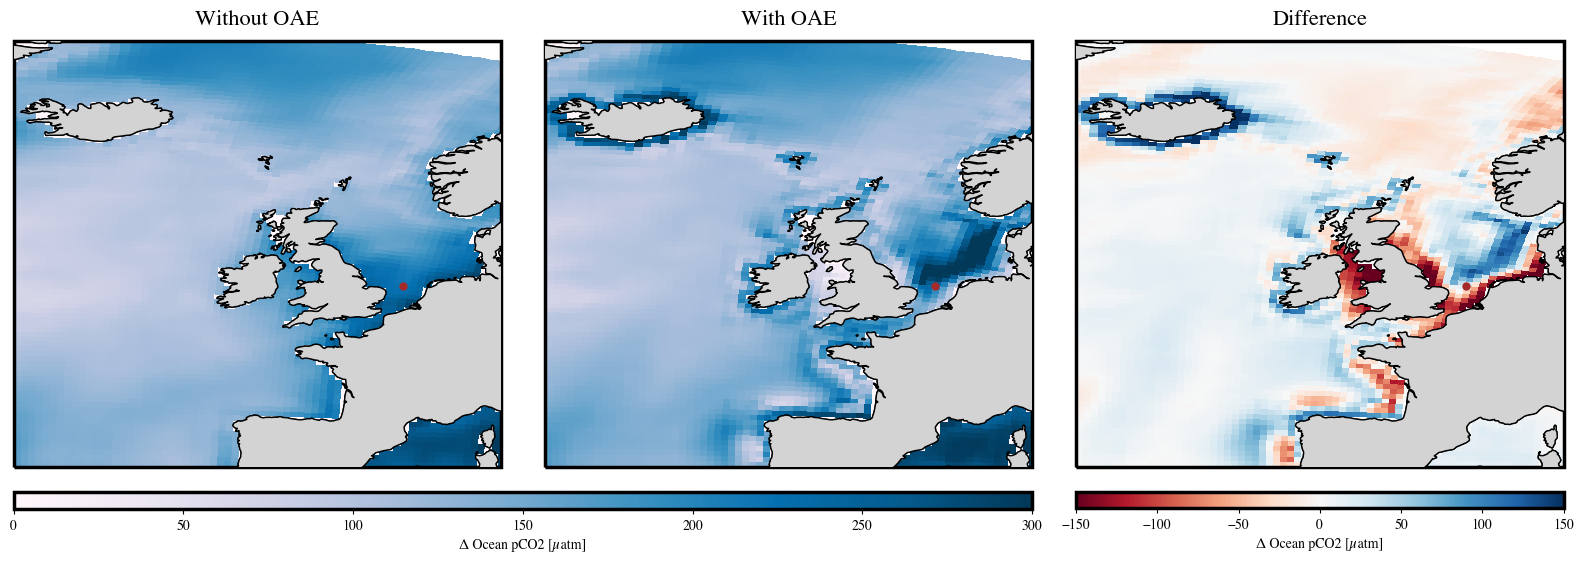

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = fco2_amplitude_base_map.fco2.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = fco2_amplitude_oae_map.fco2.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = fco2_amplitude_change_map.fco2.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=-150,
        vmax=150,
        cmap="RdBu", 
        add_colorbar=False
    )
    
axes = [ax1, ax2, ax3]

font_size = 10

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='brown', markersize=5)

for ax in axes: 
    if ax == ax1:
        ax.set_title("Without OAE", fontsize=16, y=1.02)
    elif ax == ax2:
        ax.set_title("With OAE", fontsize=16, y=1.02),
    else:
        ax.set_title("Difference", fontsize=16, y=1.02)    

font_size = 10

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('Δ Ocean pCO2 [µatm]', fontsize=10)
cbar.ax.tick_params(labelsize=font_size)

cb3 = plt.colorbar(im3, ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ Ocean pCO2 [µatm]', fontsize=10)
cb3.ax.xaxis.get_offset_text().set(size=10)
cb3.ax.tick_params(labelsize=font_size)
    
pass

#fig.suptitle('Seasonal Cycle Amplitude of Ocean pCO2 (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/FCO2_seasonal_cycletry.png')

### Amplitude at Location Point

In [28]:
fco2_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
fco2_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [29]:
fco2_max_base_slc = fco2_base_sliced.resample(time_counter='AS').max('time_counter')

In [30]:
fco2_min_base_slc = fco2_base_sliced.resample(time_counter='AS').min('time_counter')

In [31]:
fco2_amplitude_base_slc = (fco2_max_base_slc['fco2'] - fco2_min_base_slc['fco2']).to_dataset(name='fco2')

In [32]:
fco2_max_base_slc = fco2_max_base_slc.fco2.mean(dim=('time_counter'))
fco2_min_base_slc = fco2_min_base_slc.fco2.mean(dim=('time_counter'))
fco2_amplitude_base_slc = fco2_amplitude_base_slc.fco2.mean(dim=('time_counter'))

In [33]:
fco2_max_oae_slc = fco2_oae_sliced.resample(time_counter='AS').max('time_counter')

In [34]:
fco2_min_oae_slc = fco2_oae_sliced.resample(time_counter='AS').min('time_counter')

In [35]:
fco2_amplitude_oae_slc = (fco2_max_oae_slc['fco2'] - fco2_min_oae_slc['fco2']).to_dataset(name='fco2')

In [36]:
fco2_max_oae_slc = fco2_max_oae_slc.fco2.mean(dim=('time_counter'))
fco2_min_oae_slc = fco2_min_oae_slc.fco2.mean(dim=('time_counter'))
fco2_amplitude_oae_slc = fco2_amplitude_oae_slc.fco2.mean(dim=('time_counter'))

In [37]:
fco2_max_oae_slc = fco2_max_oae_slc.to_dataframe()
fco2_min_oae_slc = fco2_min_oae_slc.to_dataframe()

### Map of EU Seasonal Average of ƒCO2 without OAE

In [38]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [39]:
weights_baseline = weights_baseline.to_dataset()

In [40]:
ds_weighted_baseline = (dataframe_base.fco2 * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='fco2')
ds_unweighted_baseline = dataframe_base.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

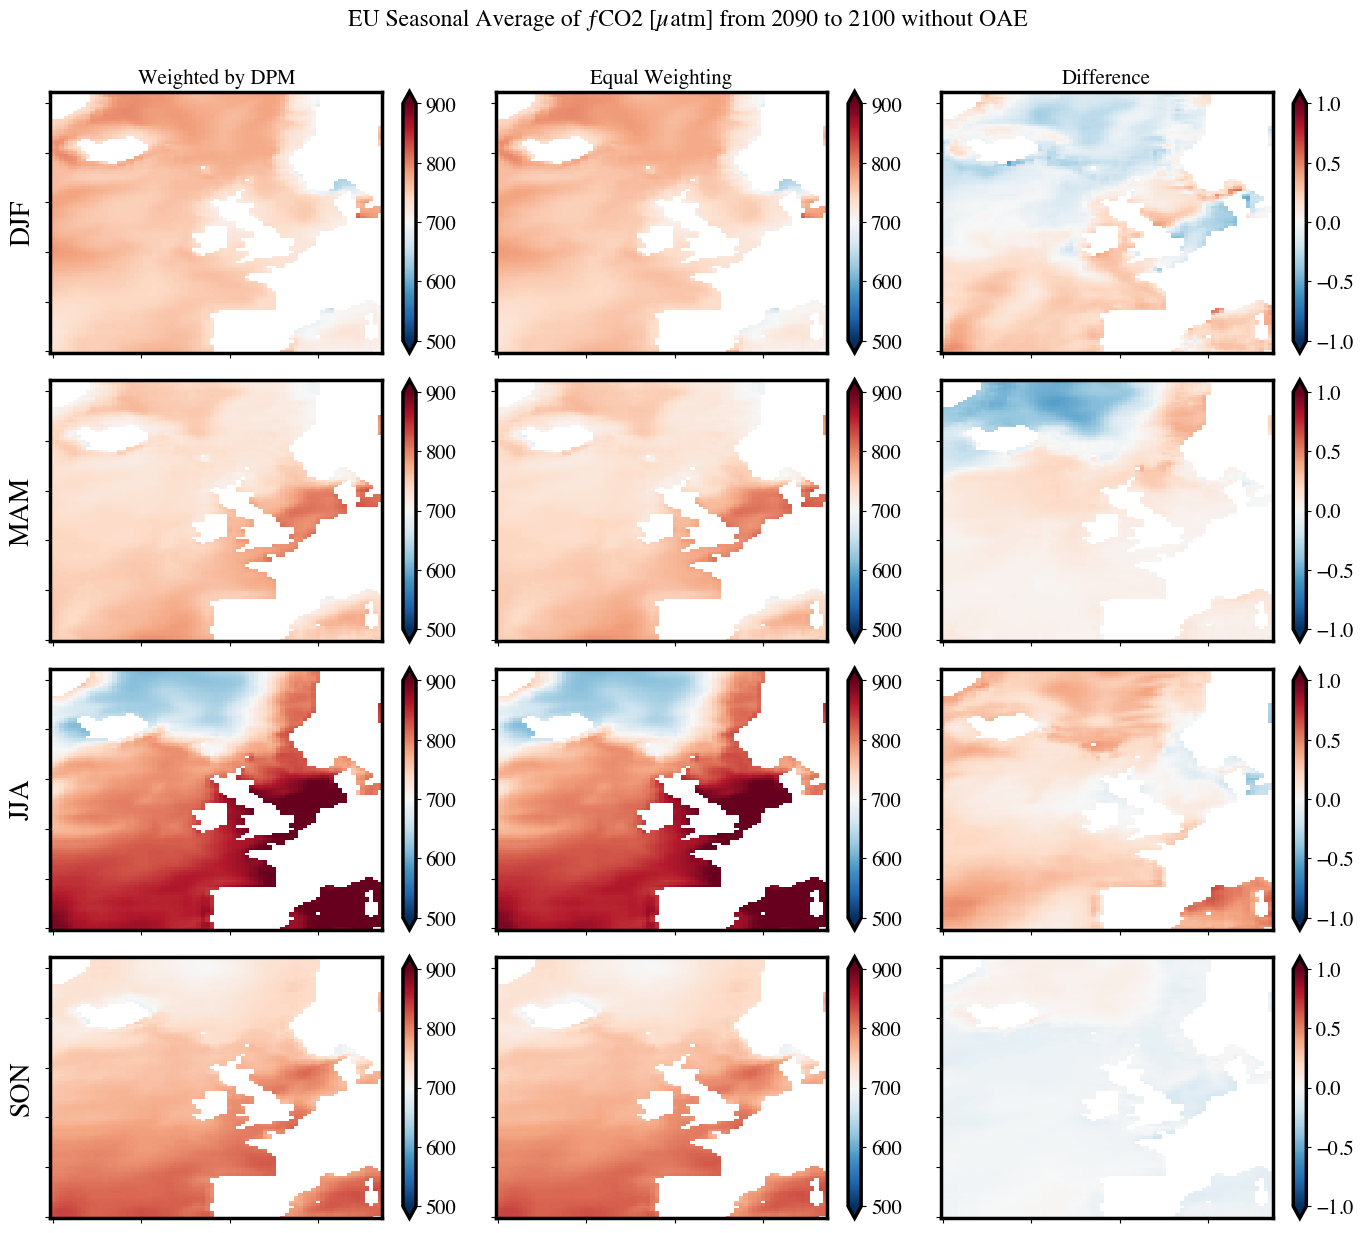

In [43]:
notnull = pd.notnull(ds_unweighted_baseline["fco2"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=500,
        vmax=900,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=500,
        vmax=900,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-1,
        vmax=1,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of ƒCO2 [µatm] from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of ƒCO2 with OAE

In [44]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [45]:
weights_oae = weights_oae.to_dataset()

In [46]:
ds_weighted_oae = (dataframe_oae.fco2 * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='fco2')
ds_unweighted_oae = dataframe_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

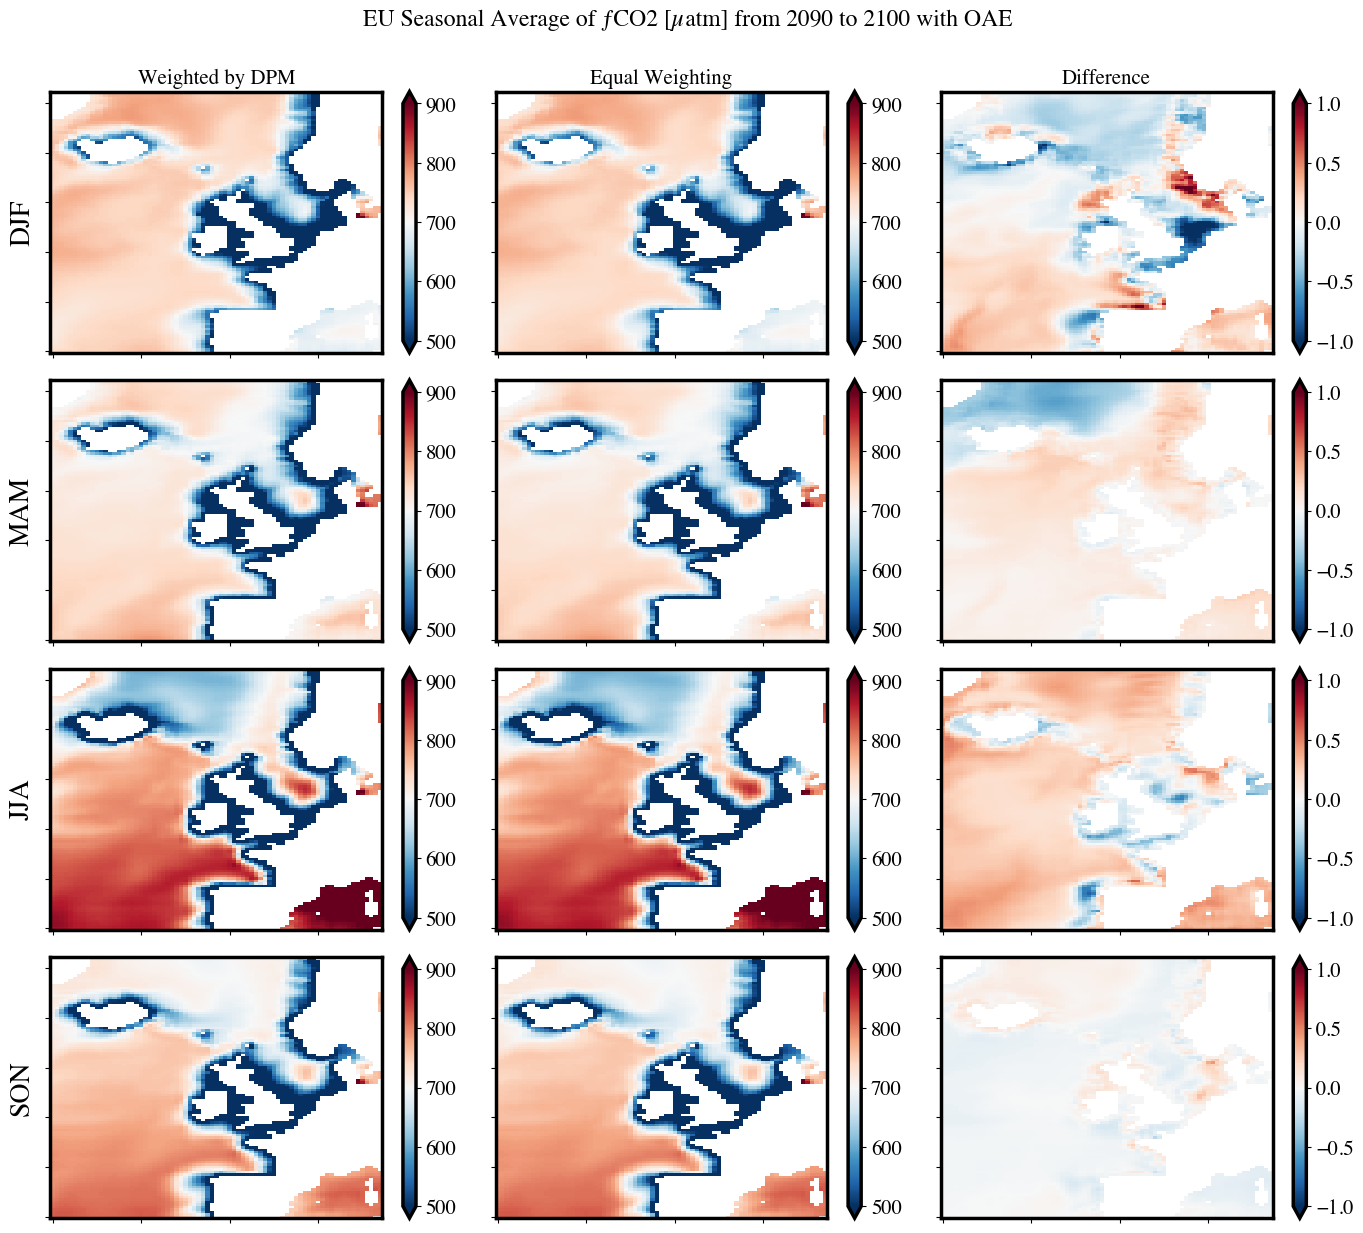

In [48]:
notnull = pd.notnull(ds_unweighted_baseline["fco2"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=500,
        vmax=900,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=500,
        vmax=900,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-1,
        vmax=1,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of ƒCO2 [µatm] from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass